#  Book Recommendation System

- During the last few decades, with the rise of Youtube, Amazon, Netflix, and many other such
web services, recommender systems have taken more and more place in our lives. 
- From e-commerce (suggest to buyers articles that could interest them) to online advertisement
(suggest to users the right contents, matching their preferences), recommender systems are
today unavoidable in our daily online journeys.
- In a very general way, recommender systems are algorithms aimed at suggesting relevant
items to users (items being movies to watch, text to read, products to buy, or anything else
depending on industries).
- Recommender systems are really critical in some industries as they can generate a huge
amount of income when they are efficient or also be a way to stand out significantly from
competitors. 
- The main objective is to create a book recommendation system for users.

### Content
The Book-Crossing dataset comprises 3 files.
- #### Users
Contains the users. Note that user IDs (User-ID) have been anonymized and map to
integers. Demographic data is provided (Location, Age) if available. Otherwise, these
fields contain NULL values.
- #### Books
Books are identified by their respective ISBN. Invalid ISBNs have already been removed
from the dataset. Moreover, some content-based information is given (Book-Title,
Book-Author, Year-Of-Publication, Publisher), obtained from Amazon Web
Services. Note that in the case of several authors, only the first is provided. URLs linking
to cover images are also given, appearing in three different flavors <b>(Image-URL-S,
Image-URL-M, Image-URL-L)</b>, i.e., small, medium, large. These URLs point to the
Amazon website.
- #### Ratings
Contains the book rating information. Ratings (Book-Rating) are either explicit,
expressed on a scale from 1-10 (higher values denoting higher appreciation), or implicit,
expressed by 0.

In [1]:
#Importing the required libraries 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings 
warnings.filterwarnings('ignore')

In [2]:
#Reading users CSV file
users = pd.read_csv('Users.csv', error_bad_lines=False, encoding='latin-1')

In [3]:
#Reading Ratings CSV file
ratings = pd.read_csv('Ratings.csv',error_bad_lines=False, encoding='latin-1')

In [4]:
# Reading Books CSV file
books = pd.read_csv('Books.csv',  error_bad_lines=False, encoding='latin-1')

In [5]:
# Let's store images URL in another dataset 
images = pd.read_csv('Books.csv',  error_bad_lines=False, encoding='latin-1')
images = images.drop(['ISBN', 'Book-Author', 'Year-Of-Publication', 'Publisher', 'Image-URL-S','Image-URL-L'], axis=1)

In [6]:
# Shape of the books dataset 
books.shape

(271360, 8)

In [7]:
# Shape of ratings dataset
ratings.shape

(1149780, 3)

In [8]:
# Shape of Users dataset
users.shape

(278858, 3)

In [9]:
# Let's see the details of books dataset
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [10]:
# Let's see the details of Users dataset
users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [11]:
# Let's see the details of Ratings dataset
ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


## EDA 

We shall be doing EDA on each dataset one by one <br>

### Rating Dataframe

In [12]:
# Info of the ratings column
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


In [13]:
# Checking the null values in the dataset 
ratings.isnull().sum()

User-ID        0
ISBN           0
Book-Rating    0
dtype: int64

In [14]:
# Checking the tendency of ratings dataset with describe
ratings.describe()

,User-ID,Book-Rating
count,1.149780e+06,1.149780e+06
mean,1.403864e+05,2.866950e+00
std,8.056228e+04,3.854184e+00
min,2.000000e+00,0.000000e+00
25%,7.034500e+04,0.000000e+00
50%,1.410100e+05,0.000000e+00
75%,2.110280e+05,7.000000e+00
max,2.788540e+05,1.000000e+01


Text(0.5, 1.0, 'Book Ratings count')

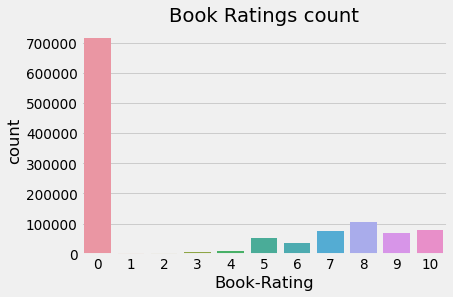

In [15]:
# Checking the distribution of the rating and see the highest number of ratings
plt.style.use('fivethirtyeight')
plt.figure(dpi=70)
sns.countplot(ratings['Book-Rating'])
plt.title('Book Ratings count')

- Here we can see that the rating 0 either shows the users did not read or rated the books.
- It shows that the most of the people either didn't rate or read the books.
- However 8 has been rated second highest after 0.
- So it would be rather better if we drop this 0 rating and do the further analysis on the columns

In [16]:
# Dropping the rating less than 0
ratings_df = ratings[ratings['Book-Rating'] > 0]

Text(0.5, 1.0, 'Book Ratings count')

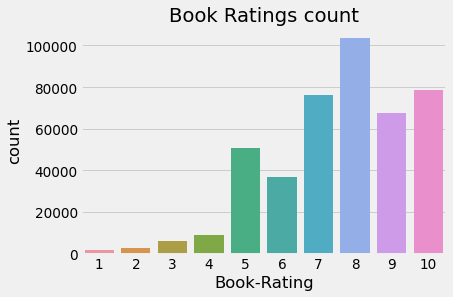

In [17]:
# Plotting the top ratings after removing the 0 rating 
plt.style.use('fivethirtyeight')
plt.figure(dpi=70)
sns.countplot(ratings_df['Book-Rating'])
plt.title('Book Ratings count')

- Now we can see that in the ratings plot most of the books have been rated 8 out of 10 
- The number for 1 rating is lowest among all 
- Second highest ratings have received as 10 and 7 stars
- Let's see these hishest ratings 

In [18]:
# Value counts of the ratings
ratings_df.value_counts().count()

433671

In [19]:
# Finding the highest rated ISBN number of the books and leter we shall plot it 
df = pd.DataFrame(ratings_df.groupby('ISBN')['Book-Rating'].count().sort_values(ascending=False).head(10))
df

,Book-Rating
ISBN,
0316666343,707
0971880107,581
0385504209,487
0312195516,383
0679781587,333
0060928336,320
059035342X,313
0142001740,307
0446672211,295


Text(0.5, 1.0, 'Top 10 ratings of the books')

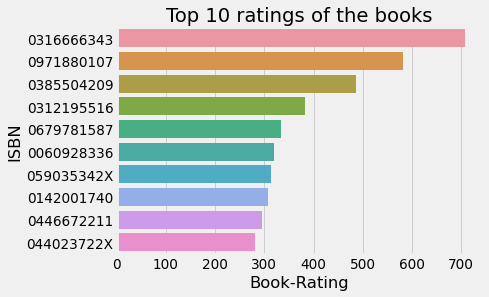

In [20]:
# Plot showing the top 10 most rated books 
plt.figure(dpi=70)
sns.barplot(y=df.index, x=df['Book-Rating'])
# plt.xticks(rotation=90)
plt.title('Top 10 ratings of the books')

- Let's merge thede ISBN with the other dataset containing names and see which all these books are 

In [21]:
# Fetching the books name with ISBN number of these top 10 books
df1 = pd.DataFrame(['0316666343', '0971880107', '0385504209', '0312195516', '0679781587', '0060928336',
                    '059035342X', '0142001740', '0446672211','044023722X'], index=np.arange(10), columns=['ISBN'])

In [22]:
# ISBN number with books name 
df1 = pd.merge(df, books, on='ISBN')
df1[['ISBN', 'Book-Rating', 'Book-Title']]

,ISBN,Book-Rating,Book-Title
0,0316666343,707,The Lovely Bones: A Novel
1,0971880107,581,Wild Animus
2,0385504209,487,The Da Vinci Code
3,0312195516,383,The Red Tent (Bestselling Backlist)
4,0060928336,320,Divine Secrets of the Ya-Ya Sisterhood: A Novel
5,059035342X,313,Harry Potter and the Sorcerer's Stone (Harry P...
6,0142001740,307,The Secret Life of Bees
7,0446672211,295,Where the Heart Is (Oprah's Book Club (Paperba...
8,044023722X,281,A Painted House


Text(0.5, 1.0, 'Top 10 books based on Rating')

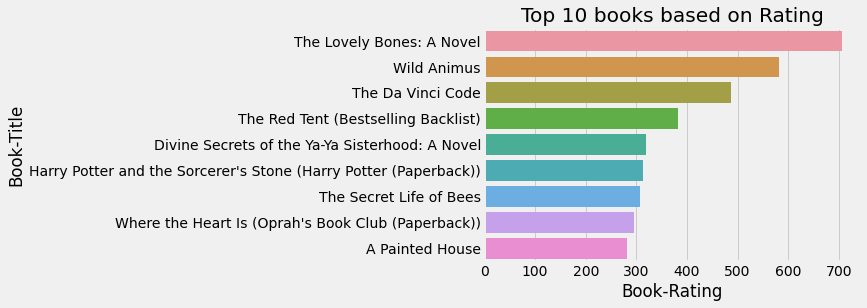

In [23]:
# Following plot shows top 10 books based on the rating
sns.barplot(y=df1['Book-Title'], x=df1['Book-Rating'])
# plt.xticks(rotation=90)
plt.title('Top 10 books based on Rating')

## Users Dataset 

In [24]:
# Checking Users data
users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [25]:
# Users data info 
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


In [26]:
# Checking the tendancy of the users dataset
users.describe()

,User-ID,Age
count,278858.00000,168096.000000
mean,139429.50000,34.751434
std,80499.51502,14.428097
min,1.00000,0.000000
25%,69715.25000,24.000000
50%,139429.50000,32.000000
75%,209143.75000,44.000000
max,278858.00000,244.000000


In [27]:
# Checking the null values by percentage of the users dataset
df = pd.DataFrame(users.isna().sum(), columns=['Null values'])
df['% Null values'] = np.round(100 * (df['Null values']) / len(users['Age']), 2)
df

,Null values,% Null values
User-ID,0,0.00
Location,0,0.00
Age,110762,39.72


- We have 39% missing values in Age column 

<AxesSubplot:>

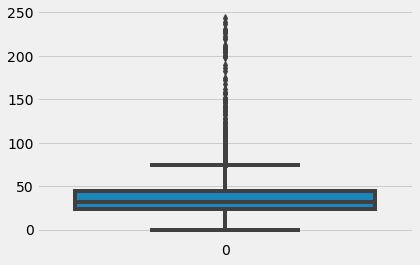

In [28]:
# Boxplot to find outlier 
sns.boxplot(data=users['Age'])

From the above plot we can see that
- The average age is lying around 50 whereas the highest age is 250 years
- Certainly we have so many outliers.
- We shall drop the rows having age more than 100 
- Let's see the skewness through histplot

<AxesSubplot:xlabel='Age', ylabel='Count'>

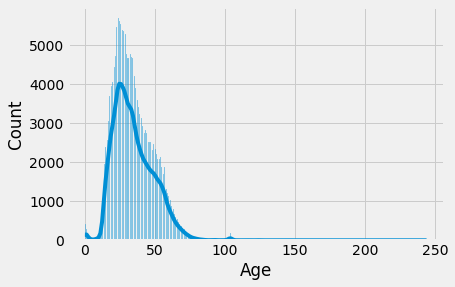

In [29]:
# Histplot shoewing the distribution of the Age column
sns.histplot(users['Age'], kde=True)

- Here we can see that the data is highly skewed to the right from it's tail
- We shall drop the outliers and see the distribution again

In [30]:
# Removing the age more than 100 years 
users_df1 = users[users['Age']<= 100]

In [31]:
# Verifying the age columns as we don't have any value more than 100 now 
users_df1[users_df1['Age'] >100]

,User-ID,Location,Age


In [32]:
# Removing the age less than 5 years 
users_df1 = users_df1[users_df1['Age'] >= 5]

#### Imputing the null values with the median of the age 

In [33]:
#Imputing the NaN values with the median of the user column 
users_df1['Age'] = users['Age'].fillna(users['Age'].median())

In [34]:
# CHecking the of the column once again 
df = pd.DataFrame(users_df1.isna().sum(), columns=['Null values'])
df['% Null values'] = np.round(100 * (df['Null values']) / len(users_df1['Age']), 2)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3 entries, User-ID to Age
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Null values    3 non-null      int64  
 1   % Null values  3 non-null      float64
dtypes: float64(1), int64(1)
memory usage: 72.0+ bytes


Text(0.5, 1.0, 'Highest number of readers with respect to age')

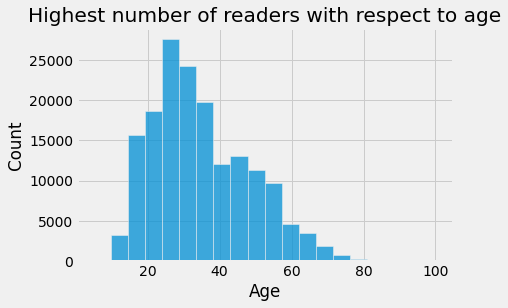

In [35]:
# Highest number of readers age group
sns.histplot(data=users_df1['Age'] , bins=20)
plt.title('Highest number of readers with respect to age')

- Highest number of the readers lies in between the age group of 20 - 40
- People having age of 20-30 are the highest readers exactly.

In [36]:
# Unique locations in various columns 
users_df1.Location.unique()

array(['stockton, california, usa', 'porto, v.n.gaia, portugal',
       'santa monica, california, usa', ...,
       'hanoi, australian capital territory, vietnam',
       'stranraer, n/a, united kingdom',
       'tacoma, washington, united kingdom'], dtype=object)

In [37]:
# Total number of unique rows in the location data
users_df1.Location.nunique()

40987

- Since we have 40,987 unique names of the countries along the city names
- It is not feasible for our dataset to keep these number of unique items 
- So we shall extract the country data only from the rows
- This country data to a new column and then we shall do further analysis

In [38]:
# Function to extract country name from the location column 

def extract(name):
    l = len(name)
    s = ""
    for i in range(l-1,0,-1):
        if(name[i] !=',' or name[i]=='&'):
            s+=name[i]
        else:
            break
    s = s[::-1]
    return s

In [39]:
#Testing the function 
extract('Varanasi, Uttar Pradesh, India')

' India'

In [40]:
# Creating a new column and applying the function on it to get country name
users_df1['Country'] = users_df1['Location'].apply(extract)
users_df11 = users_df1.drop('Location', axis=1)

In [41]:
# Checking the columns again 
users_df1.head()

,User-ID,Location,Age,Country
1,2,"stockton, california, usa",18.0,usa
3,4,"porto, v.n.gaia, portugal",17.0,portugal
5,6,"santa monica, california, usa",61.0,usa
9,10,"albacete, wisconsin, spain",26.0,spain
10,11,"melbourne, victoria, australia",14.0,australia


In [42]:
# Checking the unique values in the country column 
users_df1['Country'].nunique()

379

In [43]:
# Length of the column country 
len(list(users_df1['Country']))

166848

In [44]:
# Converting the unique country names into list to verify them
lst = list(users_df1.Country.unique())

In [45]:
lst

[' usa',
 ' portugal',
 ' spain',
 ' australia',
 ' brazil',
 '',
 ' germany',
 ' mexico',
 ' china',
 ' canada',
 ' italy',
 ' united kingdom',
 ' france',
 ' netherlands',
 ' iraq',
 ' new zealand',
 ' india',
 ' ghana',
 ' switzerland',
 ' iran',
 ' bosnia and herzegovina',
 ' sri lanka',
 ' belgium',
 ' malaysia',
 ' turkey',
 ' philippines',
 ' finland',
 ' norway',
 ' greece',
 ' kuwait',
 ' chile',
 ' taiwan',
 ' pakistan',
 ' espaÃ±a',
 ' denmark',
 ' argentina',
 ' nigeria',
 ' romania',
 ' singapore',
 ' vietnam',
 ' tunisia',
 ' egypt',
 ' uzbekistan',
 ' qatar',
 ' syria',
 ' austria',
 ' indonesia',
 ' sudan',
 ' saudi arabia',
 ' somewherein space',
 ' thailand',
 ' ireland',
 ' venezuela',
 ' mozambique',
 ' morocco',
 ' colombia',
 ' spain"',
 '"',
 ' sweden',
 ' poland',
 ' slovakia',
 ' bulgaria',
 ' basque country',
 ' ethiopia',
 ' united kingdom"',
 ' portugal"',
 ' japan',
 ' albania',
 ' the',
 ' cuba',
 ' russia',
 ' antigua and barbuda',
 ' nigeria"',
 ' jersey

From the list of countries we can see that there are so many useless values.
- Useless values involve invalid country name of unknows data format.
- We shall filter out countries name and try to add the proper values in it.

In [46]:
# List of all the useless country names that we have in our dataset
ls1 = [' &#32654;&#22269;','','"',' the',' öð¹ú',' &#32654;&#22269;',' ?ú?{',' n/a - on the road',
           ' n/a',' ä¸\xadå?½',' l',' \\"n/a\\""',' x',' &#20013;&#22269;',' ä¸\xadå?½',' 5057chadwick ct.',
 ' far away...',' chinaÃ¶Ã°Â¹Ãº',' berguedÃ\xa0',' china Ã¶Ã°Â¹Ãº']

In [47]:
# Let's drop these columns 
for x in ls1:
    if x in users_df1['Country']:
        list(users_df1['Country']).remove(x)

In [48]:
# We shall replace empty values with as others 
users_df1['Country']=users_df1['Country'].replace('','others')
list(users_df1['Country'])

[' usa',
 ' portugal',
 ' usa',
 ' spain',
 ' australia',
 ' spain',
 ' brazil',
 'others',
 ' usa',
 ' spain',
 ' germany',
 ' usa',
 ' usa',
 ' germany',
 ' mexico',
 ' usa',
 ' china',
 ' usa',
 ' usa',
 ' canada',
 ' spain',
 ' italy',
 ' usa',
 ' usa',
 ' usa',
 ' usa',
 ' germany',
 ' italy',
 ' united kingdom',
 ' usa',
 ' usa',
 ' usa',
 ' usa',
 ' usa',
 ' usa',
 ' france',
 ' canada',
 ' usa',
 ' usa',
 ' canada',
 ' united kingdom',
 ' netherlands',
 ' usa',
 ' usa',
 ' canada',
 ' united kingdom',
 ' usa',
 ' usa',
 ' spain',
 ' usa',
 ' iraq',
 ' new zealand',
 ' usa',
 ' spain',
 ' india',
 ' usa',
 ' usa',
 ' united kingdom',
 ' usa',
 ' portugal',
 ' mexico',
 ' usa',
 ' usa',
 ' ghana',
 ' usa',
 ' france',
 ' usa',
 ' usa',
 ' usa',
 ' netherlands',
 ' switzerland',
 ' usa',
 ' usa',
 ' usa',
 ' usa',
 ' usa',
 ' germany',
 ' usa',
 ' usa',
 ' united kingdom',
 ' iran',
 ' netherlands',
 ' france',
 ' bosnia and herzegovina',
 ' italy',
 ' germany',
 ' portugal',
 ' p

In [49]:
# Let's find out the readers number based on the country 
df = pd.DataFrame(users_df1['Country'].value_counts())
df = df.head(20)
df

,Country
usa,76042
spain,12506
united kingdom,12425
canada,11325
germany,10539
australia,8809
italy,5325
france,2988
portugal,2639
new zealand,1986


Text(0.5, 1.0, 'Highest number of readers based on the country')

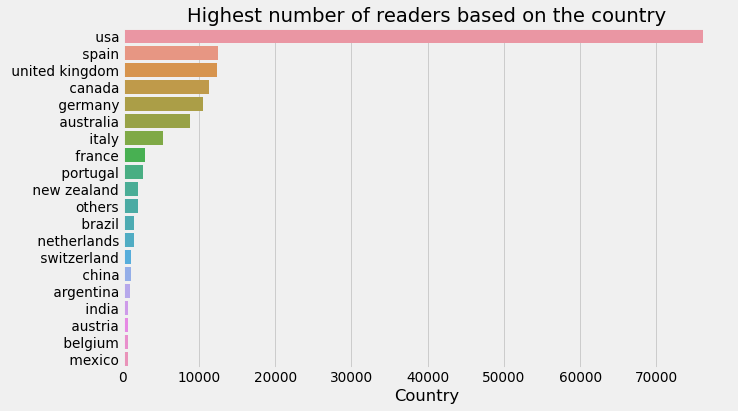

In [50]:
# Plot showing the highest number of readers with respect to country 
plt.figure(dpi=70, figsize=(10,6))
sns.barplot(data=df, y=df.index, x=df['Country'])
plt.title('Highest number of readers based on the country')

## Books Dataset 

In [51]:
# Let's explore book dataset
books_df = books.copy()
books_df.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


#### Checking and removing null values 

In [52]:
# Checking the null values
books_df.isnull().sum()

ISBN                   0
Book-Title             0
Book-Author            1
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64

In [53]:
# Dropping the null values
books_df1 = books_df.dropna()

In [54]:
# Now we don't have any null values in our dataset
books_df1.isnull().sum()

ISBN                   0
Book-Title             0
Book-Author            0
Year-Of-Publication    0
Publisher              0
Image-URL-S            0
Image-URL-M            0
Image-URL-L            0
dtype: int64

In [55]:
# Let's explore the top 10 authors 
df = pd.DataFrame(books_df1['Book-Author'].value_counts())
df = df.head(10)
df

,Book-Author
Agatha Christie,632
William Shakespeare,567
Stephen King,524
Ann M. Martin,423
Carolyn Keene,373
Francine Pascal,372
Isaac Asimov,330
Nora Roberts,315
Barbara Cartland,307
Charles Dickens,302


## Top 10 Authors 

Text(0, 0.5, 'Authors name')

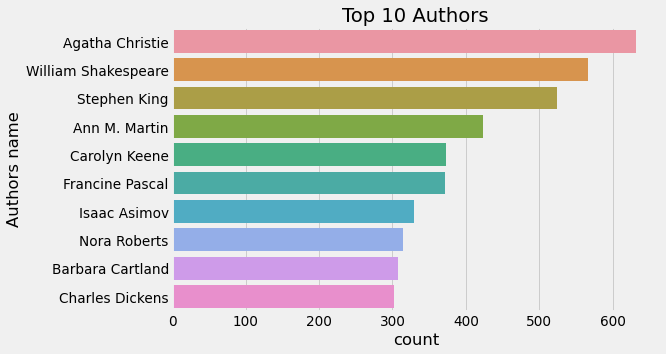

In [56]:
# Barplot showing the top 10 authors 
plt.figure(figsize=(8,5), dpi=70)
sns.barplot(data=df, y=df.index, x=df['Book-Author'])
plt.title('Top 10 Authors')
plt.xlabel('count')
plt.ylabel('Authors name')

## Top 10 Publishers

Text(0, 0.5, 'Publishers name')

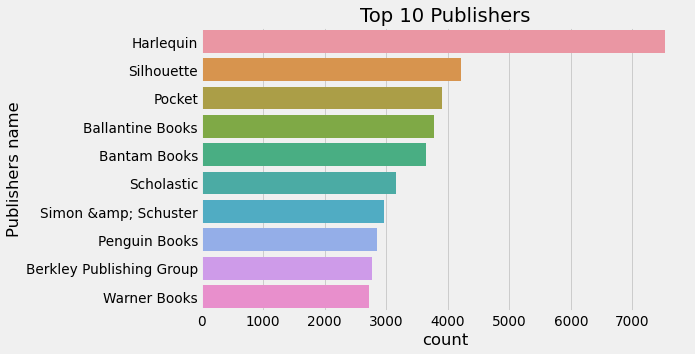

In [57]:
# Top 10 publishers based on the count of the books published
df = pd.DataFrame(books_df1['Publisher'].value_counts())
df = df.head(10)
plt.figure(figsize=(8,5), dpi=70)
sns.barplot(data=df, y=df.index, x=df['Publisher'])
plt.title('Top 10 Publishers')
plt.xlabel('count')
plt.ylabel('Publishers name')

### Let's rename the columns of the datasets 

We shall be renaming the below columns:
- Books dataset
- Users dataset
- Ratings dataset

In [58]:
# Columns of the books 
books.columns

Index(['ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher',
       'Image-URL-S', 'Image-URL-M', 'Image-URL-L'],
      dtype='object')

In [59]:
# Removing the unnecessary columns 
books = books[['ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher']]

In [60]:
books.head(2)

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada


In [61]:
# Renaming the stiff coulmns into normal one
books.rename(columns={'Book-Title':'title',
             'Book-Author':'author',
             'Year-Of-Publication':'year',
             'Publisher':'publisher'}, inplace=True)

In [62]:
books.head(2)

,ISBN,title,author,year,publisher
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada


In [63]:
# Checking the columns of the users 
users.columns

Index(['User-ID', 'Location', 'Age'], dtype='object')

In [64]:
# Renaming the columns 
users = users.rename(columns={'User-ID':'user_id','Location':'location','Age':'age'})

In [65]:
# Verifying the name of the columns 
users.columns

Index(['user_id', 'location', 'age'], dtype='object')

In [66]:
# CHecking the ratings dataset
ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [67]:
# Renaming the columns of the updated dataset
ratings = ratings.rename(columns={'User-ID':'user_id', 'Book-Rating':'rating'})

In [68]:
ratings.head(2)

,user_id,ISBN,rating
0,276725,034545104X,0
1,276726,0155061224,5


In [69]:
# Rechecking the shape 
users.shape

(278858, 3)

In [70]:
# Ratings shape
ratings.shape

(1149780, 3)

In [71]:
# Books shape 
books.shape

(271360, 5)

# Taking the users having 200 ratings and minimum 50 users
Now we shall see that how many users have provided rating 

In [72]:
ratings['user_id'].value_counts().shape

(105283,)

We have 105283 users who rated the books out of 278858 users

<br>

##  Let's see the users rated more than 200 times
Now we shall remove the users based on two conditions
- The users who rated less than 200 (<200)
- And the books which were rated less than 50 (<50)

In [73]:
# Removing the users rated less than 200 times
df = ratings['user_id'].value_counts() > 200

In [74]:
df[df].shape

(899,)

- So we have 899 users who have rated more than 200 times.
- Hence we shall take them forward for the model 

In [75]:
# Index of the users who have reviwed 200 times
uid = df[df].index

In [76]:
# Extracting the UID from the ratings columns 
ratings = ratings[ratings['user_id'].isin(uid)]

In [77]:
ratings.head()

,user_id,ISBN,rating
1456,277427,002542730X,10
1457,277427,0026217457,0
1458,277427,003008685X,8
1459,277427,0030615321,0
1460,277427,0060002050,0


In [78]:
# Merging the books based on ISBN
ratings_with_books = ratings.merge(books, on='ISBN')

In [79]:
ratings_with_books.head(2)

,user_id,ISBN,rating,title,author,year,publisher
0,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc
1,3363,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc


In [80]:
# Shape of the books rating 
ratings_with_books.shape

(487671, 7)

In [81]:
# Gouping the dataset based on title and Rating 
number_rating = ratings_with_books.groupby('title')['rating'].count().reset_index()

In [82]:
# Let's rename the rating column
number_rating.rename(columns={'rating':'number of rating'},inplace=True)

In [83]:
number_rating.head()

,title,number of rating
0,A Light in the Storm: The Civil War Diary of ...,2
1,Always Have Popsicles,1
2,Apple Magic (The Collector's series),1
3,Beyond IBM: Leadership Marketing and Finance ...,1
4,Clifford Visita El Hospital (Clifford El Gran...,1


In [84]:
# Creating the final rating dataset after merging the books dataset to number of rating dataset
final_rating = ratings_with_books.merge(number_rating, on='title')

In [85]:
final_rating.head()

,user_id,ISBN,rating,title,author,year,publisher,number of rating
0,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,82
1,3363,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,82
2,11676,002542730X,6,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,82
3,12538,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,82
4,13552,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,82


In [86]:
# Shape of final rating 
final_rating.shape

(487671, 8)

In [87]:
# Let's remove the books that have rated less than 50 times 
final_rating = final_rating[final_rating['number of rating'] >=50]

In [88]:
final_rating.shape

(61853, 8)

- So we hvae 61853 users who have rated more 200 times
- And so we shall the those books only which have been rated more than 50 times
<br>

### Dropping the duplicates

In [89]:
# Dropping the duplicates data from dataframe
final_rating = final_rating.drop_duplicates(['user_id','title'])

In [90]:
# Now we have zero duplicates values left 
final_rating.duplicated().sum()

0

In [91]:
# Shape of the final rating dataset 
final_rating.shape

(59850, 8)

So we had some duplicates sitting in the dataframe now have been removed 
<br>

### Checking the nan values

In [92]:
# CHecking the NaN values last time 
final_rating.isnull().sum()

user_id             0
ISBN                0
rating              0
title               0
author              0
year                0
publisher           0
number of rating    0
dtype: int64

In [93]:
df = final_rating.merge(users, on='user_id')

In [94]:
#Filter out the age columns
df = df[df['age']<100]

In [95]:
# Checking if there is any null values in the age 
df['age'].isnull().sum()

0

In [96]:
df.head()

,user_id,ISBN,rating,title,author,year,publisher,number of rating,location,age
0,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,82,"gilbert, arizona, usa",48.0
1,277427,0060930535,0,The Poisonwood Bible: A Novel,Barbara Kingsolver,1999,Perennial,133,"gilbert, arizona, usa",48.0
2,277427,0060934417,0,Bel Canto: A Novel,Ann Patchett,2002,Perennial,108,"gilbert, arizona, usa",48.0
3,277427,0061009059,9,One for the Money (Stephanie Plum Novels (Pape...,Janet Evanovich,1995,HarperTorch,108,"gilbert, arizona, usa",48.0
4,277427,006440188X,0,The Secret Garden,Frances Hodgson Burnett,1998,HarperTrophy,79,"gilbert, arizona, usa",48.0


# Building a Recommendation Engine

In [97]:
# Let's design a recommendar system based on final_rating dataset
# Let's create a pivot table
book_pivot = final_rating.pivot_table(columns ={'user_id'}, index='title', values='rating')
book_pivot.shape

(742, 888)

In [98]:
# Checking the Pivot table 
book_pivot.head()

user_id,254,2276,2766,2977,3363,3757,4017,4385,6242,6251,...,274004,274061,274301,274308,274808,275970,277427,277478,277639,278418
title,,,,,,,,,,,,,,,,,,,,,
1984,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
1st to Die: A Novel,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2nd Chance,NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN
4 Blondes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
84 Charing Cross Road,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,10.0,NaN,NaN,NaN,NaN


In [99]:
# Filling nan values with 0
book_pivot = book_pivot.fillna(0)
book_pivot.head()

user_id,254,2276,2766,2977,3363,3757,4017,4385,6242,6251,...,274004,274061,274301,274308,274808,275970,277427,277478,277639,278418
title,,,,,,,,,,,,,,,,,,,,,
1984,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1st to Die: A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2nd Chance,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4 Blondes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
84 Charing Cross Road,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0


## Importing the necessory libraries  

In [100]:
# Let's cluster this pivot table using NearestNeighbors
# Let's decompose this matrix into sparse matrix to get rid from 0 

from scipy.sparse import csr_matrix

In [101]:
# Creating the sparse matrix 
book_sparse = csr_matrix(book_pivot)

In [102]:
type(book_sparse)

scipy.sparse.csr.csr_matrix

## Importing Nearest Neighbors algorithm 

In [103]:
# Algorithm
from sklearn.neighbors import NearestNeighbors

In [104]:
# Creating instance of the model with type brute as we want to apply this on whole matrix dataset 
model = NearestNeighbors(algorithm='brute')

In [105]:
# Training the model
model.fit(book_sparse)

NearestNeighbors(algorithm='brute')

In [106]:
# Distances store the most nearest books in numpy array and suggestions contains the ISBN number of them
# Checking the distance and suggestions at ISBN of 237
distances, suggestions = model.kneighbors(book_pivot.iloc[237,:].values.reshape(1,-1), n_neighbors=6)

In [107]:
distances

array([[ 0.        , 68.78953409, 69.5413546 , 72.64296249, 76.83098333,
        77.28518616]])

In [108]:
suggestions

array([[237, 240, 238, 241, 184, 536]], dtype=int64)

In [109]:
# Printing the recommended books 
for i in range(len(suggestions)):
    print(book_pivot.index[suggestions[i]])

Index(['Harry Potter and the Chamber of Secrets (Book 2)',
       'Harry Potter and the Prisoner of Azkaban (Book 3)',
       'Harry Potter and the Goblet of Fire (Book 4)',
       'Harry Potter and the Sorcerer's Stone (Book 1)', 'Exclusive',
       'The Cradle Will Fall'],
      dtype='object', name='title')


Hurrey! Testing is successful now let's create a function to perform recommendation 

In [110]:
# Function that takes input as book name and recommends book to users 
def recommend_books(name):
    book_id = np.where(book_pivot.index== name)[0][0]
    distances, suggestions = model.kneighbors(book_pivot.iloc[book_id,:].values.reshape(1,-1), n_neighbors=6)
    
    for i in range(len(suggestions)):
        print(book_pivot.index[suggestions[i]])
        print

In [111]:
# Let's test this for the one of the political books Animal Farm and see the recommendation
recommend_books('Animal Farm')

Index(['Animal Farm', 'Exclusive', 'Jacob Have I Loved', 'Second Nature',
       'Pleading Guilty', 'No Safe Place'],
      dtype='object', name='title')


In [112]:
recommend_books('Wild Animus')

Index(['Wild Animus', 'Exclusive', 'No Safe Place', 'The First Counsel',
       'Jacob Have I Loved', 'Long After Midnight'],
      dtype='object', name='title')


# Popularity based filtering 

In [202]:
df.shape

(46328, 10)

In [203]:
df = df.drop_duplicates()

In [204]:
df.shape

(46328, 10)

In [206]:
df=df[df['rating']!=0]

In [207]:
df.shape

(11159, 10)